In [5]:
import pandas as pd

In [4]:
data = pd.read_excel('../data/附件14不同放牧强度土壤碳氮监测数据.xlsx')
data.head()

,year,放牧小区（plot）,放牧强度（intensity）,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比
0,2012,G17,NG,17.051564,11.300000,28.351564,2.192376,12.931887
1,2012,G19,NG,19.529439,11.333333,30.862772,1.883051,16.389768
2,2012,G21,NG,14.549908,9.600000,24.149908,1.871001,13.818022
3,2012,G6,LGI,18.672931,12.666667,31.339598,2.407612,12.160230
4,2012,G12,LGI,13.904905,8.133333,22.038239,1.933916,11.395652


In [5]:
data.shape

(132, 8)

In [42]:
f=open('../data/附件15群落结构监测数据集.csv')
temp1=pd.read_csv(f,encoding='utf-8')
temp1.head()

,年份,轮次,处理,日期,植物种名,植物群落功能群,放牧小区Block,重复,营养苗,生殖苗,株/丛数,丛幅1,丛幅2,鲜重(g),干重(g)
0,2019,牧前,轻牧（3天）,2019.5.10,大针茅,PB,G6,1,24.0,NaN,15.0,11.0,11.0,59.43,25.41
1,2019,牧前,轻牧（3天）,2019.5.10,羊草,PR,G6,1,12.0,NaN,17.0,NaN,NaN,1.70,0.64
2,2019,牧前,轻牧（3天）,2019.5.10,苔草,PR,G6,1,11.0,NaN,13.0,NaN,NaN,1.27,0.99
3,2019,牧前,轻牧（3天）,2019.5.10,糙隐子草,PB,G6,1,4.0,NaN,16.0,4.0,4.0,2.60,1.25
4,2019,牧前,轻牧（3天）,2019.5.10,知母,PF,G6,1,4.0,NaN,9.0,NaN,NaN,0.62,0.30


In [43]:
#附件15缺失值寻找：“干重”列无缺失值
#附件15异常值寻找
i_ano = [] 
for i in range(len(temp1)):
    if temp1.iat[i,13] < temp1.iat[i,14]:  #干重大于鲜重
        i_ano.append(i)
        print(temp1.iat[i,13])


1.46
0.53
0.12
0.19
0.15
0.15
12.61
0.11
14.25
0.17
0.24
40.77
0.42
2.07
0.18
0.17
0.11
0.11
3.09
5.89
25.18
1.53
0.6
0.15
6.13
1.46
0.41
11.15
24.06
0.34
0.86
1.78
12.5


In [44]:
#附件15异常值处理
#对于年中（第一、二、三轮牧后）的异常值，取相邻两轮做线性插值
#对于年首尾（牧前、第四轮牧后）的异常值，取各年均值
b =['牧前','第一轮','第二轮','第三轮','第四轮']
for i in i_ano:
    if (temp1.iat[i,1] != "牧前")&(temp1.iat[i,1] != "第四轮牧后"):
        b_temp = b.index(temp1.iat[i,1].split('牧后')[0])
        for j in range(1000):
            if ((temp1.iat[i-j,1]).split('牧后')[0] ==  b[b_temp-1])&(temp1.iat[i,4] == temp1.iat[i-j,4])&(temp1.iat[i,6] == temp1.iat[i-j,6]):
                ano_temp_1 = temp1.iat[i-j,14]
                break
        for j in range(1000):
            if ((temp1.iat[i+j,1]).split('牧后')[0] ==  b[b_temp+1])&(temp1.iat[i,4] == temp1.iat[i+j,4])&(temp1.iat[i,6] == temp1.iat[i+j,6]):
                ano_temp_2 = temp1.iat[i+j,14]
                break
        temp1.iat[i,14] = (ano_temp_1+ano_temp_2)/2
       # print(i)
        #print(ano_temp_1)
        #print(ano_temp_2)
       # print(temp1.iat[i,14])
  #  else:
        


In [45]:
temp1['inner']=temp1.apply(lambda x:x['放牧小区Block']+'-'+str(x['年份']),axis=1)
data['inner']=data.apply(lambda x:x['放牧小区（plot）']+'-'+str(x['year']),axis=1)

In [46]:
temp1.head()

,年份,轮次,处理,日期,植物种名,植物群落功能群,放牧小区Block,重复,营养苗,生殖苗,株/丛数,丛幅1,丛幅2,鲜重(g),干重(g),inner
0,2019,牧前,轻牧（3天）,2019.5.10,大针茅,PB,G6,1,24.0,NaN,15.0,11.0,11.0,59.43,25.41,G6-2019
1,2019,牧前,轻牧（3天）,2019.5.10,羊草,PR,G6,1,12.0,NaN,17.0,NaN,NaN,1.70,0.64,G6-2019
2,2019,牧前,轻牧（3天）,2019.5.10,苔草,PR,G6,1,11.0,NaN,13.0,NaN,NaN,1.27,0.99,G6-2019
3,2019,牧前,轻牧（3天）,2019.5.10,糙隐子草,PB,G6,1,4.0,NaN,16.0,4.0,4.0,2.60,1.25,G6-2019
4,2019,牧前,轻牧（3天）,2019.5.10,知母,PF,G6,1,4.0,NaN,9.0,NaN,NaN,0.62,0.30,G6-2019


In [47]:
data2=pd.merge(data,temp1,on='inner')
data2.head()

,year,放牧小区（plot）,放牧强度（intensity）,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比,inner,年份,...,植物群落功能群,放牧小区Block,重复,营养苗,生殖苗,株/丛数,丛幅1,丛幅2,鲜重(g),干重(g)
0,2016,G17,NG,18.682066,2.4,21.082066,2.332079,9.04003,G17-2016,2016,...,PB,G17,1,40.0,NaN,10.0,5.0,5.0,54.90,27.0
1,2016,G17,NG,18.682066,2.4,21.082066,2.332079,9.04003,G17-2016,2016,...,PR,G17,1,25.0,NaN,74.0,NaN,NaN,33.26,16.0
2,2016,G17,NG,18.682066,2.4,21.082066,2.332079,9.04003,G17-2016,2016,...,PF,G17,1,16.0,NaN,22.0,NaN,NaN,17.18,4.0
3,2016,G17,NG,18.682066,2.4,21.082066,2.332079,9.04003,G17-2016,2016,...,PB,G17,1,7.0,NaN,9.0,3.0,3.0,4.70,2.0
4,2016,G17,NG,18.682066,2.4,21.082066,2.332079,9.04003,G17-2016,2016,...,PF,G17,1,30.0,NaN,1.0,NaN,NaN,3.26,1.0


In [48]:
#空值检测
data2.isnull().sum()

year                   0
放牧小区（plot）             0
放牧强度（intensity）        0
SOC土壤有机碳               0
SIC土壤无机碳               0
STC土壤全碳                0
全氮N                    0
土壤C/N比                 0
inner                  0
年份                     0
轮次                     0
处理                     0
日期                     0
植物种名                   0
植物群落功能群                0
放牧小区Block              0
重复                     0
营养苗                   24
生殖苗                12581
株/丛数                 357
丛幅1                 9438
丛幅2                10054
鲜重(g)                705
干重(g)                  0
dtype: int64

In [51]:
data2=data2[[ '年份', '放牧小区（plot）', '放牧强度（intensity）', 'SOC土壤有机碳', 'SIC土壤无机碳',
       'STC土壤全碳', '全氮N', '土壤C/N比',  '轮次', '处理', '干重(g)']]
data2.to_excel("data2.xlsx", sheet_name='Sheet1', index=False)

In [52]:
data2.shape

(14297, 11)

In [6]:
temp3 = pd.read_excel("../data/附件3、土壤湿度2022—2012年.xls")
temp3['年份']=temp3['年份'].astype(str)

In [7]:
temp3['time']=temp3.apply(lambda x:x['年份']+'-'+str(x['月份']),axis=1)
temp3.head()

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),time
0,1,2022,115.375,44.125,12.45,52.14,93.45,164.48,2022-1
1,2,2022,115.375,44.125,12.10,52.14,93.45,164.48,2022-2
2,3,2022,115.375,44.125,14.96,52.13,93.44,164.48,2022-3
3,1,2021,115.375,44.125,15.17,50.40,82.44,165.92,2021-1
4,2,2021,115.375,44.125,13.93,50.40,82.44,165.92,2021-2


In [8]:
import matplotlib.pyplot as plt


In [9]:
H_date_y = temp3['time']
H_date_x3 = temp3['100cm湿度(kg/m2)']
H_date_x2 = temp3['40cm湿度(kg/m2)']
H_date_x1 = temp3['10cm湿度(kg/m2)']
H_date_x4 = temp3['200cm湿度(kg/m2)']

In [10]:
fig = plt.figure(figsize=(40,10))

<Figure size 4000x1000 with 0 Axes>

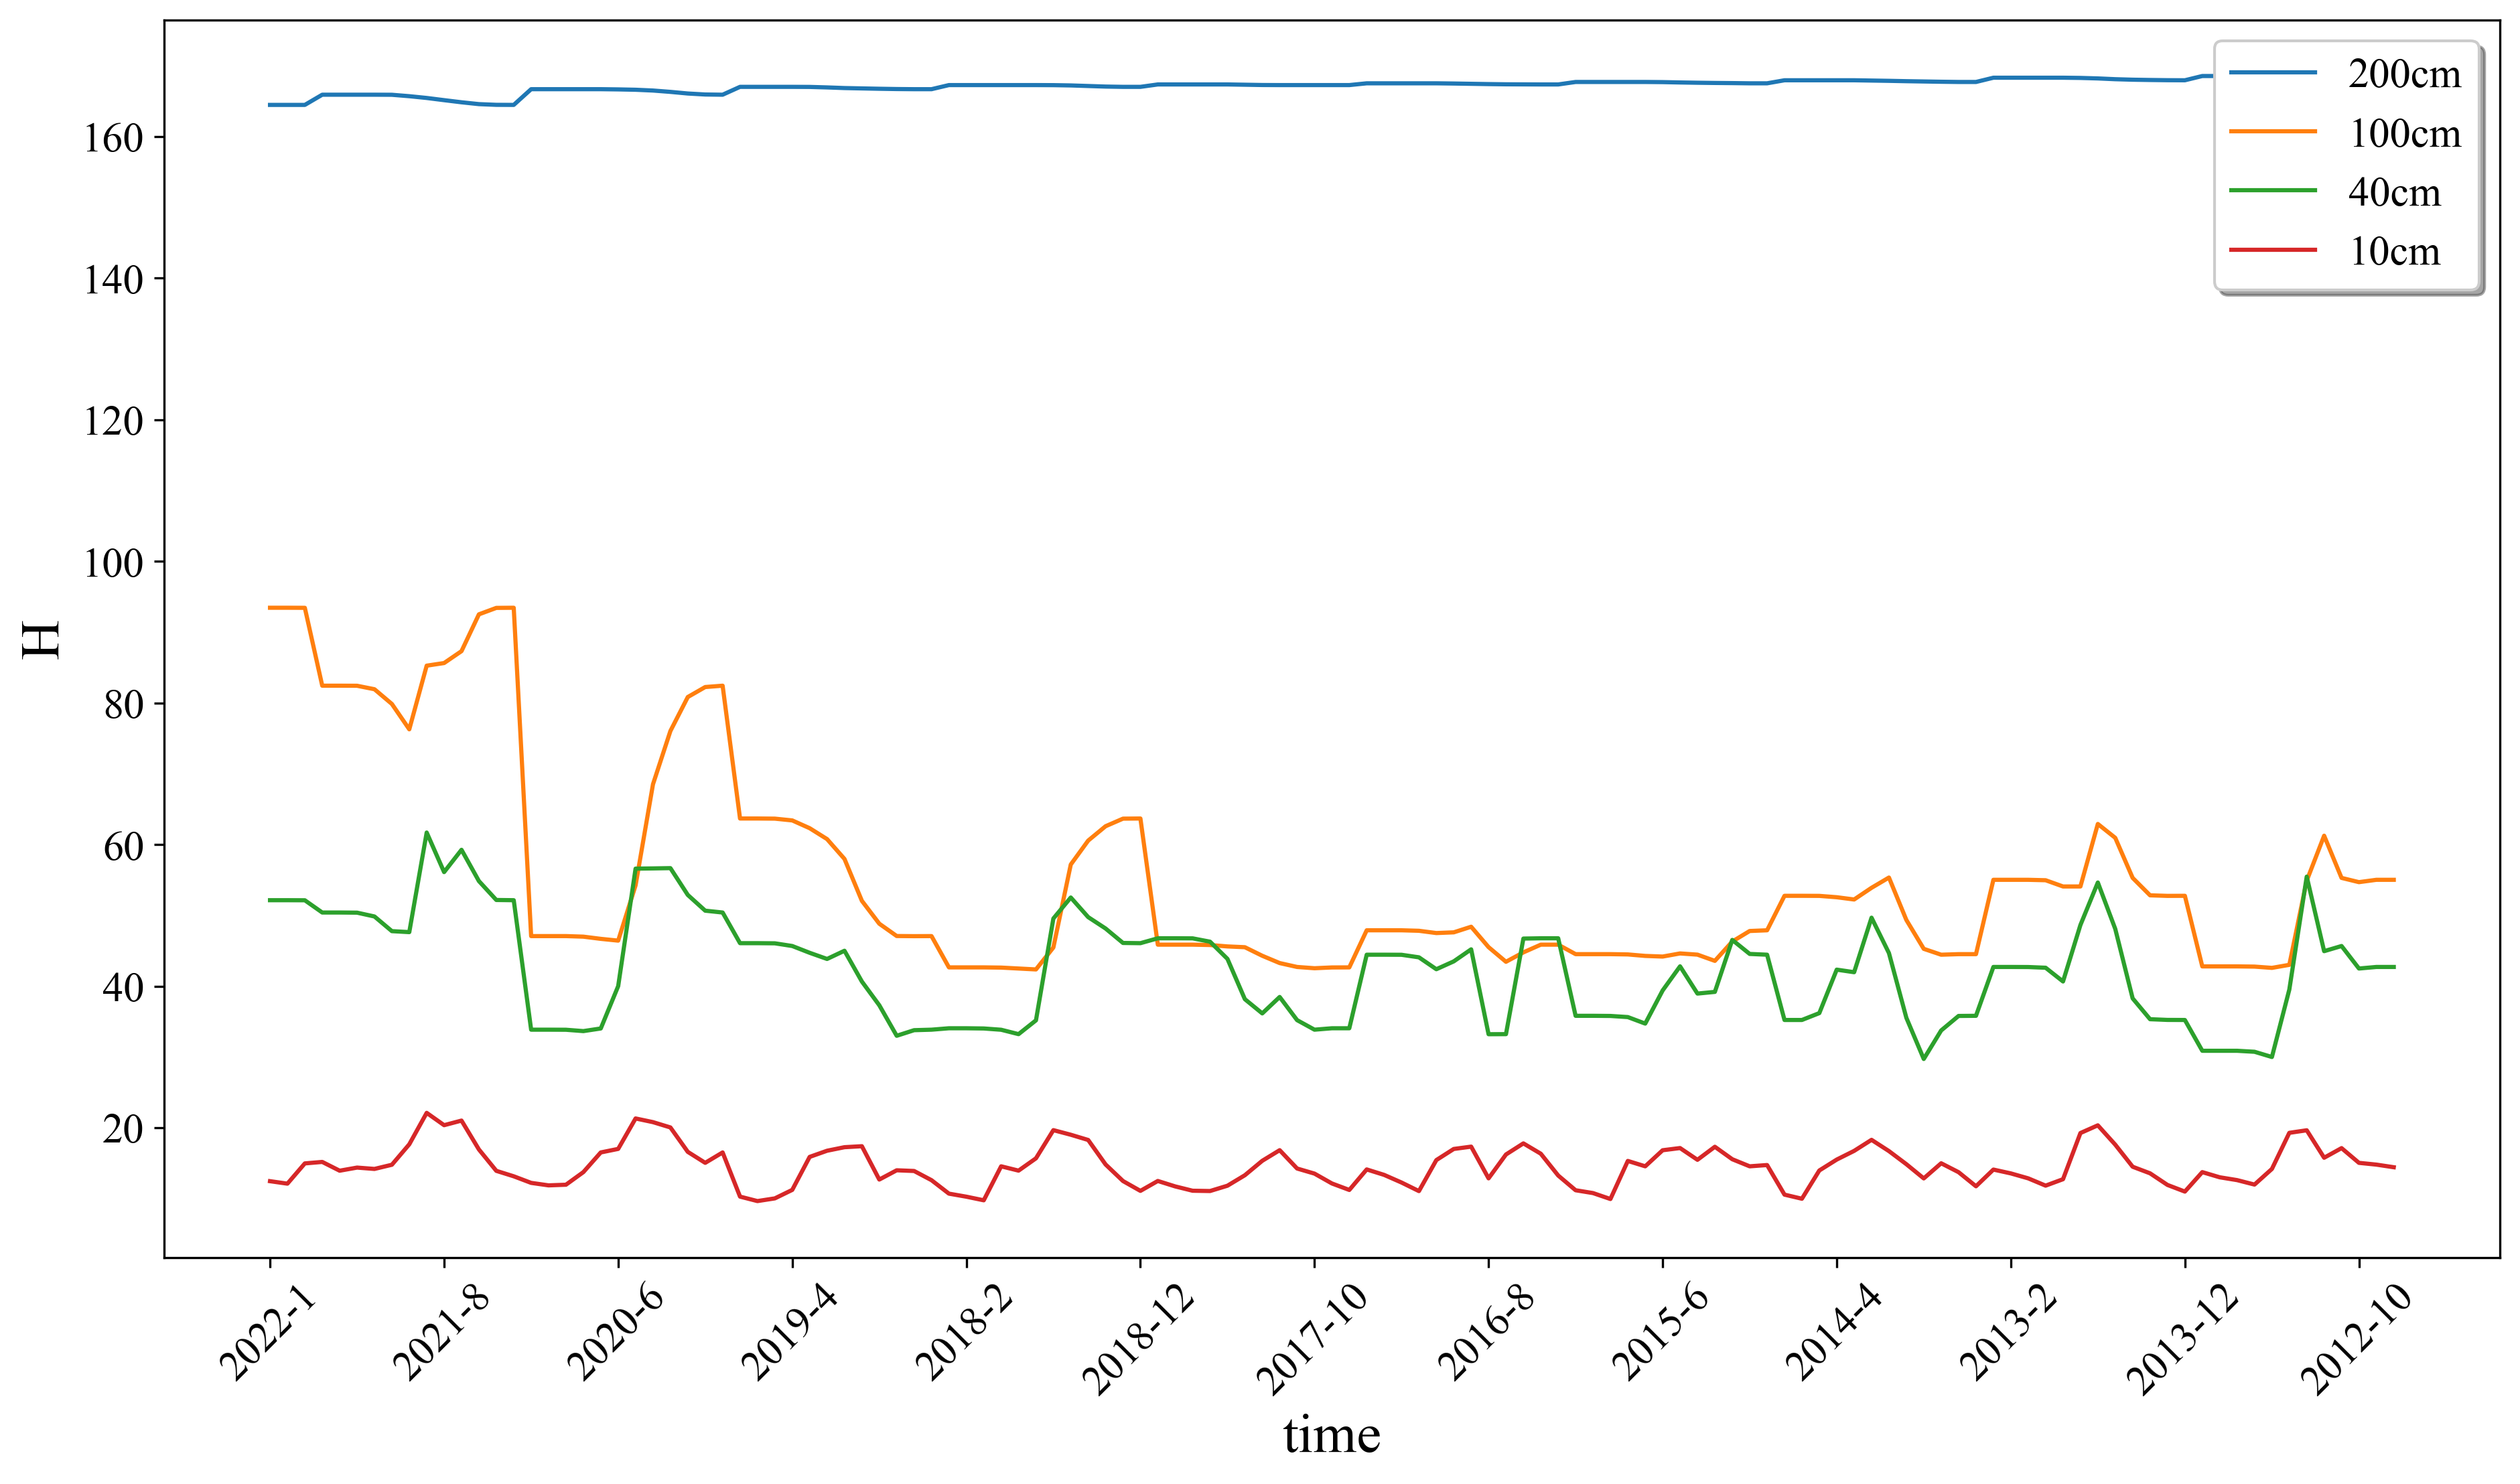

<Figure size 4000x1000 with 0 Axes>

In [37]:
import matplotlib.ticker as ticker
import pylab
plt.figure(figsize=(15, 8), dpi=300) 
plt.plot(H_date_y,H_date_x4)
plt.plot(H_date_y,H_date_x3)
plt.plot(H_date_y,H_date_x2)
plt.plot(H_date_y,H_date_x1)
#plt.tick_params(top = 'off',right = 'off')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
pylab.xticks(rotation=45)
plt.xticks(fontname="Times New Roman", fontsize=15)
plt.yticks(fontname="Times New Roman", fontsize=15)

#plt.rcParams['font.sans-serif']=['SimHei'] 
#plt.rcParams['axes.unicode_minus']=False
plt.xlabel('time',fontname="Times New Roman",fontsize=20)
plt.ylabel('H',fontname="Times New Roman",fontsize=20)

plt.legend(["200cm", "100cm","40cm","10cm"], 
           prop={"family": "Times New Roman", "size": 15},
           fancybox=True,shadow=True,loc='upper right')
fig = plt.figure(figsize=(40,10))


In [27]:
temp4 = pd.read_excel("../data/附件3：土壤湿度%.xlsx")
temp4['time']=temp3.apply(lambda x:x['年份']+'-'+str(x['月份']),axis=1)
temp4.head()

,月份,年份,湿度(%),time
0,1,2022,0.15804,2022-1
1,2,2022,0.15769,2022-2
2,3,2022,0.16053,2022-3
3,1,2021,0.14801,2021-1
4,2,2021,0.14677,2021-2


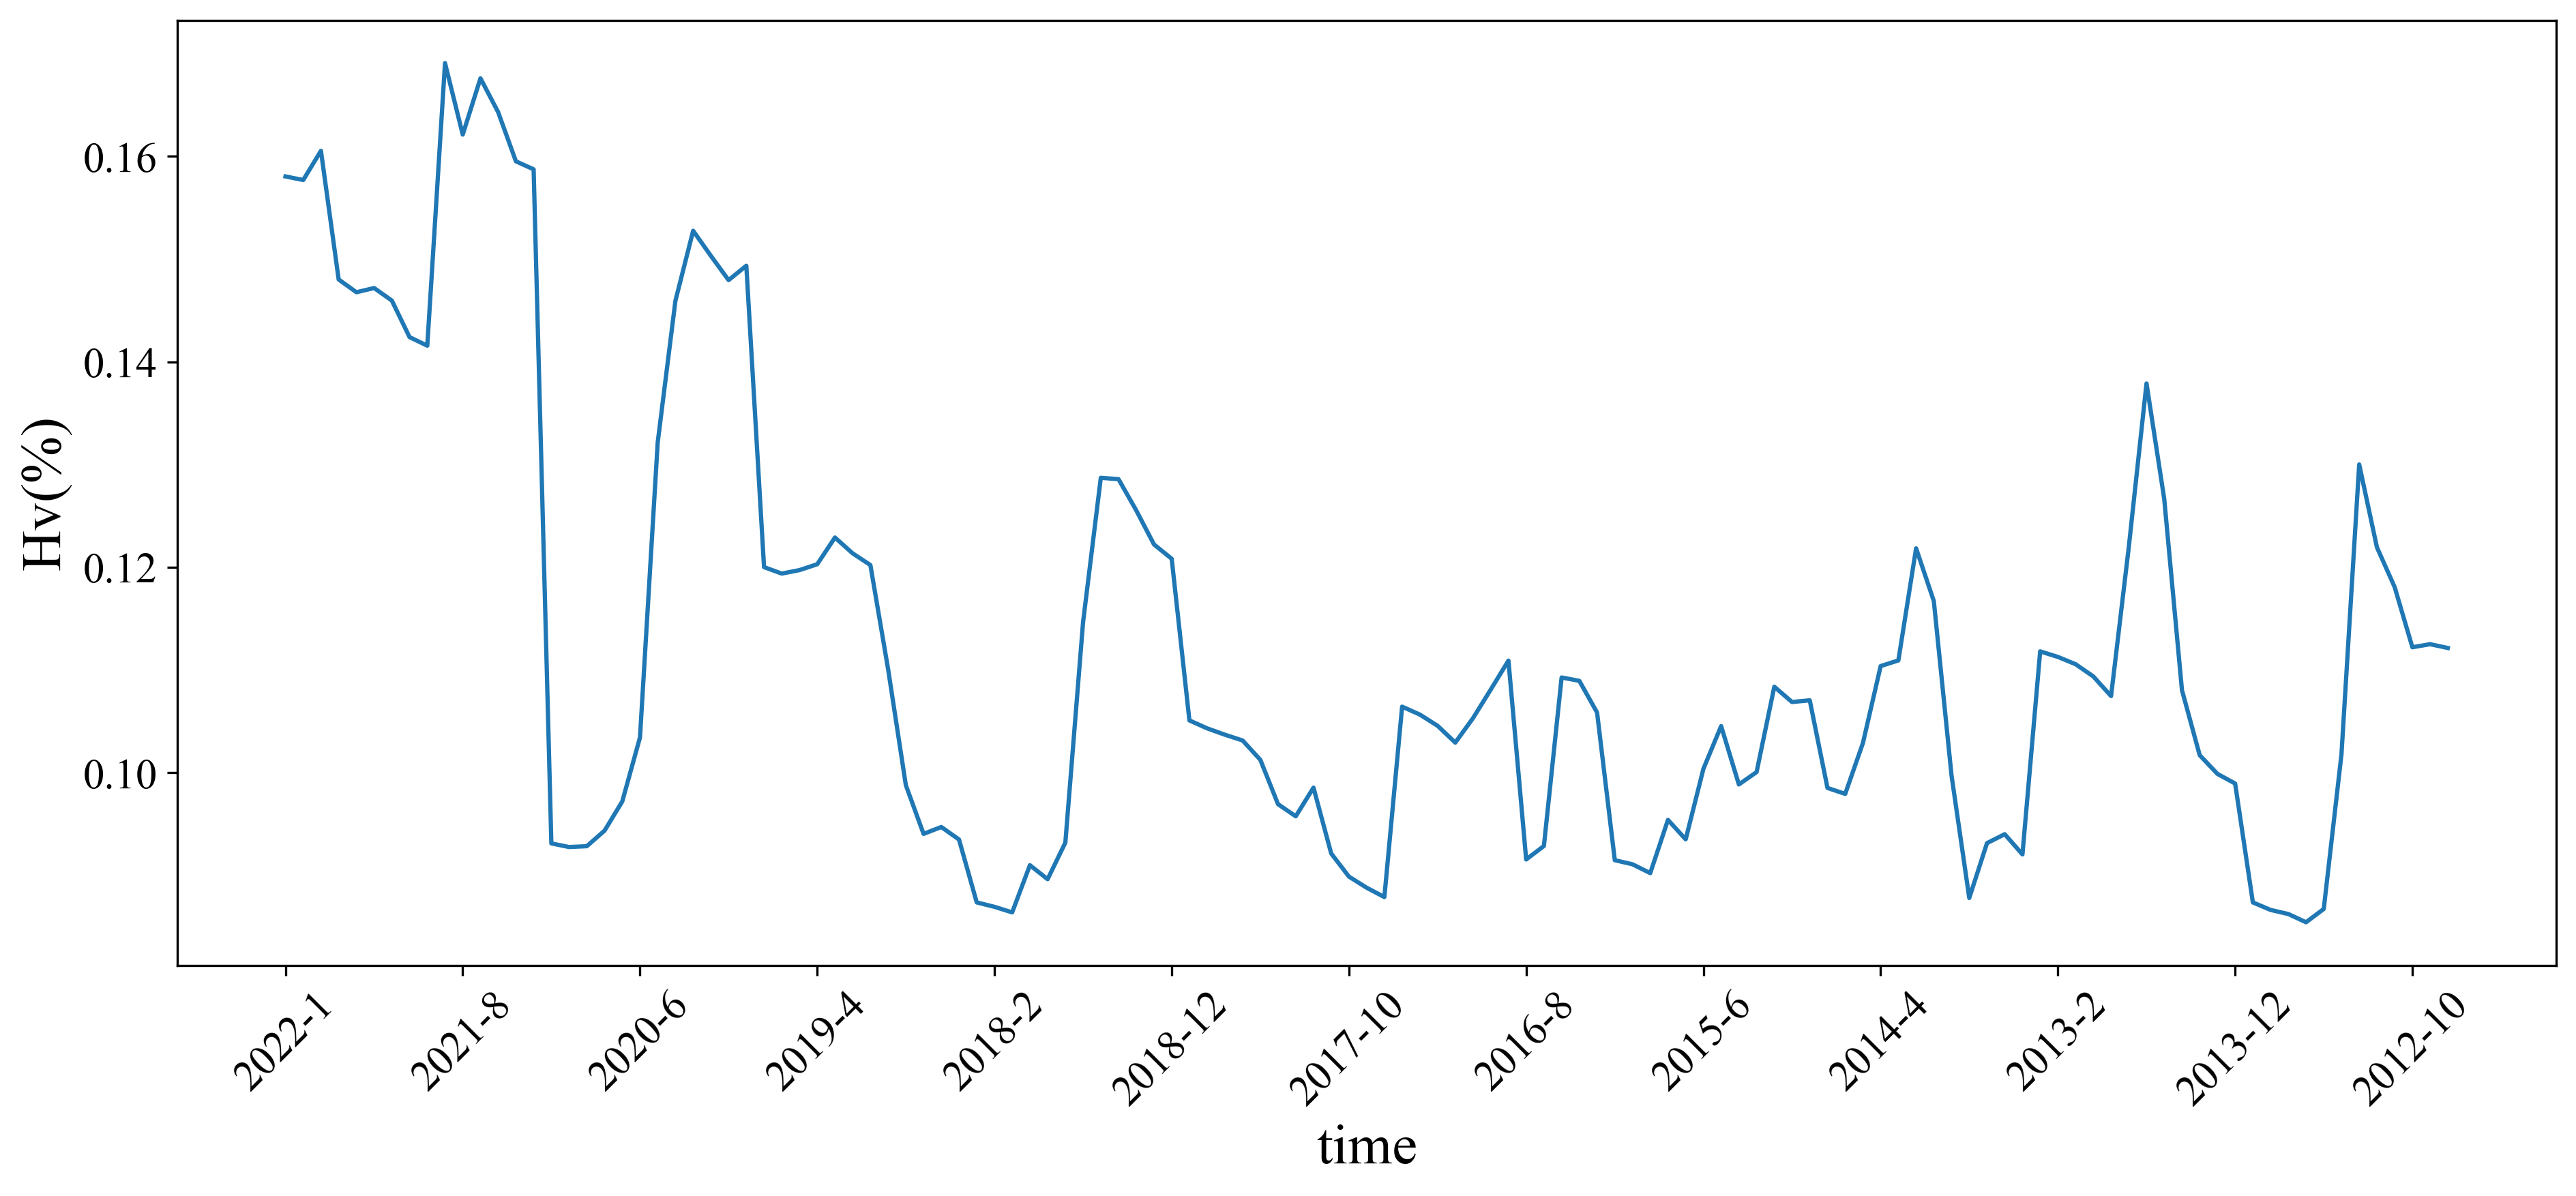

<Figure size 4000x1000 with 0 Axes>

In [36]:
Hv_date_y = temp4['time']
Hv_date_x = temp4['湿度(%)']
plt.figure(figsize=(15, 6), dpi=300) 
plt.plot(Hv_date_y,Hv_date_x)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
pylab.xticks(rotation=45)
plt.xticks(fontname="Times New Roman", fontsize=15)
plt.yticks(fontname="Times New Roman", fontsize=15)

plt.xlabel('time',fontname="Times New Roman",fontsize=20)
plt.ylabel('Hv(%)',fontname="Times New Roman",fontsize=20)

#plt.legend(["Hv"], 
#           prop={"family": "Times New Roman", "size": 15},
#           fancybox=True,shadow=True,loc='upper right')
fig = plt.figure(figsize=(40,10))